# NHL Season Data to Predict Rankings
### Jacob Mayer, Kyle

In [168]:
import pandas as pd


#file_17_18 = pd.read_excel('NHL_stats.xlsx',sheet_name =0, skiprows= 1)
file_16_17 = pd.read_excel('NHL_stats.xlsx',sheet_name =1, skiprows= 1)
file_15_16 = pd.read_excel('NHL_stats.xlsx',sheet_name =2, skiprows= 1)
file_14_15 = pd.read_excel('NHL_stats.xlsx',sheet_name =3, skiprows= 1)
file_13_14 = pd.read_excel('NHL_stats.xlsx',sheet_name =4, skiprows= 1)
file_12_13 = pd.read_excel('NHL_stats.xlsx',sheet_name =5, skiprows= 1)
file_11_12 = pd.read_excel('NHL_stats.xlsx',sheet_name =6, skiprows= 1)
file_10_11 = pd.read_excel('NHL_stats.xlsx',sheet_name =7, skiprows= 1)
file_09_10 = pd.read_excel('NHL_stats.xlsx',sheet_name =8, skiprows= 1)
file_08_09 = pd.read_excel('NHL_stats.xlsx',sheet_name =9, skiprows= 1)
file_07_08 = pd.read_excel('NHL_stats.xlsx',sheet_name =10, skiprows= 1)
file_06_07 = pd.read_excel('NHL_stats.xlsx',sheet_name =11, skiprows= 1)
#usecols= [0,1,2,7,8,9,10,13,14,15,16,17]
stats_lst = [file_06_07,file_07_08,file_08_09,file_09_10,file_10_11,file_11_12,file_12_13,file_13_14,file_14_15,file_15_16,file_16_17]
file_07_08

,Rk,2007-2008,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1.0,Detroit Red Wings*,32.1,82,54,21,7,115,0.701,252,...,84.03,5,7,11.4,12.7,2820,8.9,1930,0.907,9
1,2.0,San Jose Sharks*,27.7,82,49,23,10,108,0.659,216,...,85.81,7,9,13.1,15.7,2428,8.9,1981,0.906,7
2,3.0,Montreal Canadiens*,27.6,82,47,25,10,104,0.634,257,...,82.46,8,3,13.3,14.1,2382,10.8,2589,0.917,6
3,4.0,Anaheim Ducks*,29.7,82,47,27,8,102,0.622,197,...,83.09,8,7,18.1,16.9,2241,8.8,2299,0.920,4
4,5.0,Pittsburgh Penguins*,26.9,82,47,27,8,102,0.622,240,...,80.95,6,10,14.4,15.1,2268,10.6,2523,0.916,8
5,6.0,New Jersey Devils*,29.2,82,46,29,7,99,0.604,198,...,82.80,6,7,11.9,12.0,2362,8.4,2257,0.914,4
6,7.0,Minnesota Wild*,27.7,82,44,28,10,98,0.598,220,...,85.15,3,10,13.4,14.1,2218,9.9,2469,0.915,5
7,8.0,New York Rangers*,27.4,82,42,27,13,97,0.591,205,...,84.55,4,6,14.1,14.3,2579,7.9,2124,0.911,12
8,9.0,Dallas Stars*,29.0,82,45,30,7,97,0.591,237,...,85.59,13,8,14.3,14.6,2187,10.8,2137,0.905,5
9,10.0,Colorado Avalanche*,28.5,82,44,31,7,95,0.579,224,...,81.40,2,5,12.1,12.9,2349,9.5,2237,0.903,3


In [169]:
for dataframe in stats_lst:
    # Stripping the sterisk out of the names
    for iterator , string in enumerate(dataframe.iloc[:,1]):
        dataframe.iloc[iterator,1] = string.strip('*')
    #print(dataframe.iloc[:,1])
        

In [170]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set up class labels and feature vectors
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, rank in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(rank)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 2:6]])
        
#class_labels
#feature_vector




In [171]:
# Set up the training and test vectors
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .20, train_size = .8)
#test_labels

In [172]:
from sklearn.neighbors import KNeighborsClassifier

#Using nearest neighbor to guess placing
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
#for i in range(len(results)):
#    print(test_labels[i], "    ", results[i])

In [173]:
neigh.score(test_vectors,test_labels)

0.21212121212121213

In [174]:
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, average in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(average)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 3:7]])
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .20, train_size = .8)
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
neigh.score(test_vectors,test_labels)

0.18181818181818182

In [175]:
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, games in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(games)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 4:8]])
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .20, train_size = .8)
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
neigh.score(test_vectors,test_labels)

0.18181818181818182

In [176]:
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, games in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(games)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 5:9]])
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .20, train_size = .8)
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
neigh.score(test_vectors,test_labels)

0.13636363636363635

In [190]:
def score_with_error(true_vect, guess_vect):
    # Adds +- 1 to the predicted score for a more realistic prediction
    count = 0
    for i in range(len(true_vect)):
        if (guess_vect[i] >= true_vect[i] - 1) and  (guess_vect[i] <= true_vect[i] + 1):
            count += 1
    return count /len(true_vect)

In [179]:
feat_vect = []
score = []
placement_scores = {
    'Top5':[],
    'Middle5':[],
    'Bottom5':[]
}
for j in range(len(file_07_08)):
    top5=[]
    middle5 = []
    bottom5 = []
    
    class_labels = []
    feature_vectors = []
    for dataframe in stats_lst:
        for iteration, average in enumerate(dataframe.iloc[:-1,0]):
            class_labels.append(average)
            feature_vectors.append([i for i in dataframe.iloc[iteration, 2+j:6+j]])
    train_vectors, test_vectors, train_labels, test_labels = train_test_split(
        feature_vectors, class_labels, test_size = .20, train_size = .8)
    neigh = KNeighborsClassifier(n_neighbors=8)
    neigh.fit(train_vectors,train_labels)
    results = neigh.predict(test_vectors)
    
    for val in range(len(test_labels)): # collecting placement data
        if test_labels[val] <=5:
            top5.append([test_labels[val], results[val]])
        elif (12 < test_labels[val] < 18):
            middle5.append([test_labels[val], results[val]])
        elif (test_labels[val] >= 25):
            bottom5.append([test_labels[val], results[val]])
            
    placement_scores['Top5'].append(top5)
    placement_scores['Middle5'].append(middle5)
    placement_scores['Bottom5'].append(bottom5)
    
    score.append(score_with_error(test_labels,results))
    feat_vect.append(feature_vectors)
#print(feat_vect[0]) #0-30 different vector arrays
print(np.round(score,5))

[0.59091 0.57576 0.5303  0.5     0.25758 0.39394 0.22727 0.31818 0.22727
 0.06061 0.28788 0.13636 0.24242 0.21212 0.15152 0.16667 0.21212 0.12121
 0.10606 0.09091 0.09091 0.09091 0.04545 0.07576 0.10606 0.19697 0.13636
 0.09091 0.12121 0.18182 0.13636]


# Plotting Results for Best Parameters

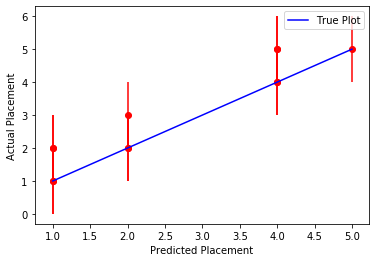

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(placement_scores['Top5'])):
    for j in placement_scores['Top5'][i]:
        if i == 0:
            plt.scatter(j[1],j[0], color = 'red', alpha = 1)
            plt.errorbar(j[1],j[0],1, color = "red")
plt.plot([1,2,3,4,5],[1,2,3,4,5], color = 'blue', label = "True Plot")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.xlabel("Predicted Placement")
plt.ylabel("Actual Placement")
plt.legend()

Text(0.5, 1.0, 'Middle 5 Rankings')

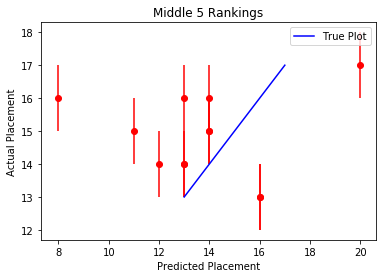

In [187]:
for i in range(len(placement_scores['Middle5'])):
    for j in placement_scores['Middle5'][i]:
        if i == 0:
            plt.scatter(j[1],j[0], color = 'red', alpha = 1)
            plt.errorbar(j[1],j[0],1, color = "red")
plt.plot([13,14,15,16,17],[13,14,15,16,17], color = 'blue', label = "True Plot")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.xlabel("Predicted Placement")
plt.ylabel("Actual Placement")
plt.legend()
plt.title("Middle 5 Rankings")

Text(0.5, 1.0, 'Bottom 5 Rankings')

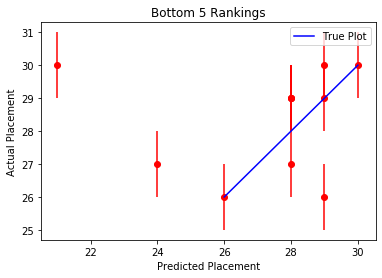

In [188]:
for i in range(len(placement_scores['Bottom5'])):
    for j in placement_scores['Bottom5'][i]:
        if i == 0:
            plt.scatter(j[1],j[0], color = 'red', alpha = 1)
            plt.errorbar(j[1],j[0],1, color = "red")
plt.plot([26,27,28,29,30],[26,27,28,29,30], color = 'blue', label = "True Plot")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.xlabel("Predicted Placement")
plt.ylabel("Actual Placement")
plt.legend()
plt.title("Bottom 5 Rankings")